## Proyecto 1 - Bicicletas compartidas
#### Juan David Rios 
#### Viviana Lara 202122798  
#### Catalina Gómez 202122560

In [1]:
import pandas as pd

data = pd.read_csv("../data/SeoulBikeData_utf8.csv")
print(data.describe())

       Rented Bike Count         Hour  Temperature(C)  Humidity(%)  \
count        8760.000000  8760.000000     8760.000000  8760.000000   
mean          704.602055    11.500000       12.882922    58.226256   
std           644.997468     6.922582       11.944825    20.362413   
min             0.000000     0.000000      -17.800000     0.000000   
25%           191.000000     5.750000        3.500000    42.000000   
50%           504.500000    11.500000       13.700000    57.000000   
75%          1065.250000    17.250000       22.500000    74.000000   
max          3556.000000    23.000000       39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
count       8760.000000       8760.000000               8760.000000   
mean           1.724909       1436.825799                  4.073813   
std            1.036300        608.298712                 13.060369   
min            0.000000         27.000000                -30.600000   
25%           

In [2]:
# Tipos de datos en el dataset
types = data.dtypes
types

Date                         object
Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
dtype: object

In [3]:
#Corregir la fecha
data["Date"] = pd.to_datetime(data["Date"],format="%d/%m/%Y")

C:\Users\vivia\AppData\Local\Temp\ipykernel_14524\1675631791.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

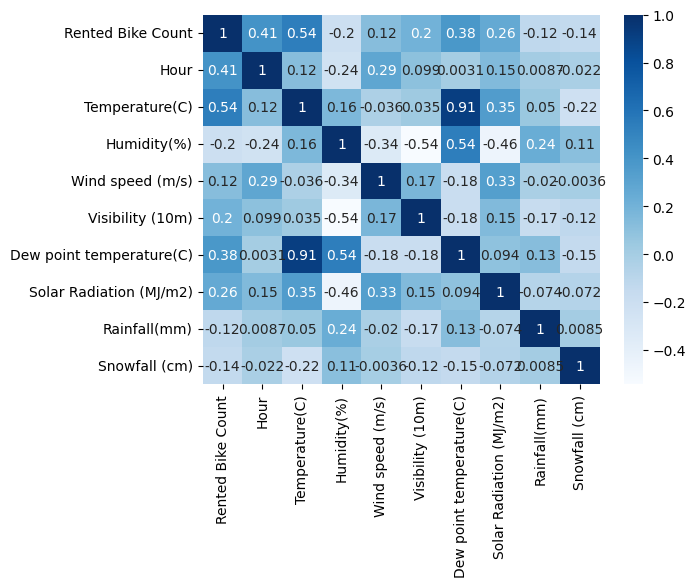

In [4]:
import seaborn as sb
corr = data.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

C:\Users\vivia\AppData\Local\Temp\ipykernel_14524\2787125939.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrw = data.drop(['Rented Bike Count'], axis=1).corrwith(data['Rented Bike Count'])


<Axes: >

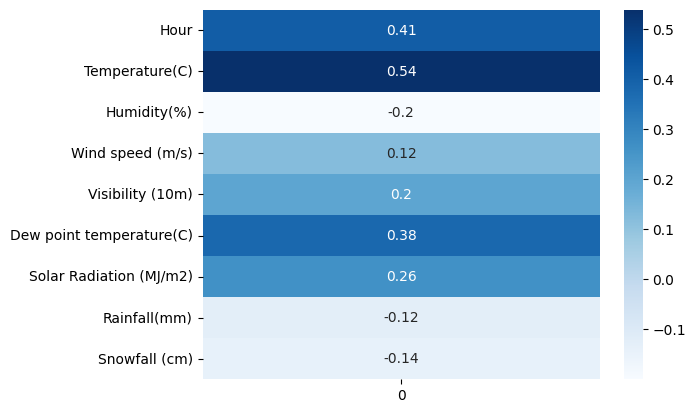

In [5]:
corrw = data.drop(['Rented Bike Count'], axis=1).corrwith(data['Rented Bike Count'])
sb.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

In [6]:
data = data.drop(["Dew point temperature(C)"], axis = 1)
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# número de valores perdidos
missing_values = data.isnull().sum()
print(f'Number of Missing Values: \n{missing_values}')


Number of Missing Values: 
Date                       0
Rented Bike Count          0
Hour                       0
Temperature(C)             0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
Holiday                    0
Functioning Day            0
dtype: int64


In [8]:
# número de duplicados
duplicates = len(data[data.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')


Number of Duplicate Entries: 0


In [9]:
# Filas donde el valor en 'Rainfall es igual a 0
cero_rainfall = len(data[data['Rainfall(mm)'] == 0])
cero_rainfall
#Rate de ceros sobre el total en 'Rainfall'
total_rainfall = data['Rainfall(mm)'].value_counts().sum()
rate_rainfall = (cero_rainfall/total_rainfall)*100
rate_rainfall
print(f'Ceros in Rainfall Rate = {rate_rainfall:.1f}%')

Ceros in Rainfall Rate = 94.0%


In [10]:
# Filas donde el valor en 'Solar Radiation (MJ/m2)' es igual a 0
cero_solar = len(data[data['Solar Radiation (MJ/m2)'] == 0])
cero_solar
#Rate de ceros sobre el total en 'Snowfall'
total_solar = data['Solar Radiation (MJ/m2)'].value_counts().sum()
rate_solar = (cero_solar/total_solar)*100
rate_solar
print(f'Ceros in Solar Radiation Rate = {rate_solar:.1f}%')

Ceros in Solar Radiation Rate = 49.1%


In [11]:
# Filas donde el valor en 'Snowfall es igual a 0
cero_snowfall = len(data[data['Snowfall (cm)'] == 0])
cero_snowfall
#Rate de ceros sobre el total en 'Snowfall'
total_snowfall = data['Snowfall (cm)'].value_counts().sum()
rate_snowfall = (cero_snowfall/total_snowfall)*100
rate_snowfall
print(f'Ceros in Snowfall Rate = {rate_snowfall:.1f}%')

Ceros in Snowfall Rate = 94.9%


In [12]:
#Eliminar columnas Snowfall y rainfall
data = data.drop(['Rainfall(mm)', 'Snowfall (cm)'], axis=1)
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,Winter,No Holiday,Yes


In [13]:
#Número de No Holiday 
no_holiday = len(data[data['Holiday'] == "No Holiday"])
no_holiday
#Rate de No Holiday sobre el total 
total_holiday = data['Holiday'].value_counts().sum()
rate_hol = (no_holiday/total_holiday)*100
rate_hol
print(f'No holiday Rate = {rate_hol:.1f}%')

No holiday Rate = 95.1%


In [14]:
#Eliminar Holiday
data = data.drop(['Holiday'], axis = 1)
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Seasons,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,Winter,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,Winter,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,Winter,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,Winter,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,Winter,Yes


In [15]:
#Número de No Functioning Days 
no_funct_day = len(data[data['Functioning Day'] == "No"])
no_funct_day
#Rate de No Holiday sobre el total 
total_funct = data['Functioning Day'].value_counts().sum()
rate_funct = (no_funct_day/total_funct)*100
rate_funct
print(f'No functioning Day Rate = {rate_funct:.1f}%')

No functioning Day Rate = 3.4%


In [16]:
#Eliminar Functioning Day
data = data.drop(['Functioning Day'], axis = 1)
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Seasons
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,Winter
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,Winter
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,Winter
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,Winter
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,Winter


In [17]:
data['Seasons'] = data['Seasons'].astype('category')
data.head()


,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Seasons
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,Winter
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,Winter
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,Winter
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,Winter
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,Winter


In [19]:
data.to_csv('../data/SeoulBikeData_limpio.csv',  encoding='utf-8' , index=False)